In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.test.is_gpu_available()


2022-11-30 18:48:14.135967: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 18:48:14.305489: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 18:48:14.305511: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-30 18:48:15.172901: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2022-11-30 18:48:16.950336: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-30 18:48:16.992209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 18:48:16.992441: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-30 18:48:16.992498: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: c

False

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data();

In [3]:
print_train_images = test_images
print_test_images = test_images

In [4]:
print(train_images.shape)

(60000, 28, 28)


In [5]:
print(train_images[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

In [6]:
train_images = train_images.reshape((60000,28,28,1)) #change format so each image is flattened

In [7]:
print(train_images[50])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 12]
  [ 56]


# Normalize to value between 0 and 1

In [8]:
train_images = train_images.astype('float32')/255.0

In [9]:
print(train_images[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [10]:
test_images = test_images.reshape(10000, 28,28,1)
test_images = test_images.astype('float32')/255


In [11]:
test_images

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

# One Hot Encode

In [12]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Model

In [13]:
model = tf.keras.models.Sequential()

2022-11-30 18:48:17.458918: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 18:48:17.459093: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Add a convolutional layer with 32 filters each is 3x3
# Note that you "loose" some pixels due to the boarder overlap. You can manually change the shape of the output to be the same (28,28,1)
#### https://keras.io/api/layers/convolution_layers/convolution2d/
# ↓

In [14]:
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))

### Apply Max pooling, poolsize = 2x2, stride = 2x2 as it will default pool_sizer is strides are automated
#### https://keras.io/api/layers/pooling_layers/max_pooling2d/
# ↓

In [15]:
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

In [16]:
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

In [17]:
model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))

# Unwrap rows into a single row

In [18]:
model.add(tf.keras.layers.Flatten())

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

# Add Fully connected layer

In [20]:
model.add(tf.keras.layers.Dense(64, activation='relu'))


In [21]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [22]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [24]:
model.fit(train_images,train_labels,epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 15s 15ms/step - loss: 0.1631 - accuracy: 0.9487
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0249 - accuracy: 0.9924
Epoch 5/5
938/938 [==============================] - 14s 14ms/step - loss: 0.0186 - accuracy: 0.9944


In [25]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9919


[0.0316116027534008, 0.9919000267982483]

In [26]:
model.save('cnnmodel.model')

INFO:tensorflow:Assets written to: cnnmodel.model/assets


INFO:tensorflow:Assets written to: cnnmodel.model/assets


In [27]:
modelReadIn = tf.keras.models.load_model('cnnmodel.model')

In [28]:
predictions = modelReadIn.predict([test_images])

313/313 [==============================] - 1s 4ms/step


In [29]:
print(np.argmax(predictions[105]))

9


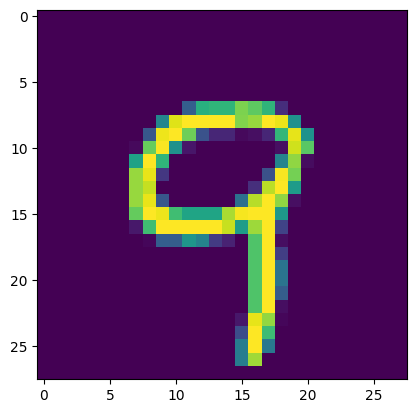

In [30]:
plt.imshow(print_test_images[105])

In [31]:
all_layers = model.layers

In [32]:
filters, biases = all_layers[0].get_weights()

In [33]:
figure1 = plt.figure(figsize=(8,12))

<Figure size 800x1200 with 0 Axes>

In [34]:
columns = 6
rows = 6

In [35]:
n_filters = 32

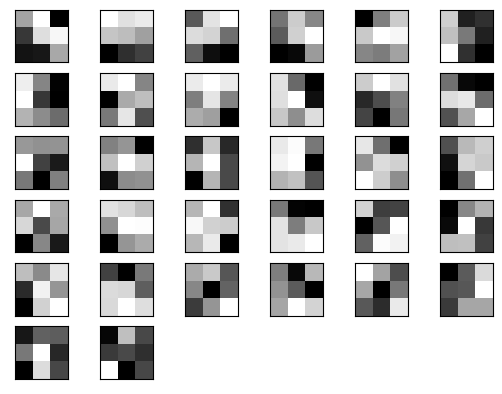

In [36]:
for i in range(1,n_filters + 1):
    f = filters[:,:,:,i-1]
    figure1 = plt.subplot(rows,columns,i)
    figure1.set_xticks([])
    figure1.set_yticks([])
    plt.imshow(f[:,:,0], cmap='gray')
plt.show()


In [37]:
conv_layers_indices = [0,2,4]
outputs = [model.layers[i].output for i in conv_layers_indices]

In [38]:
model_shortened = tf.keras.models.Model(inputs = model.inputs, outputs = outputs)

In [39]:
model_shortened.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928 

1/1 [==============================] - 0s 57ms/step


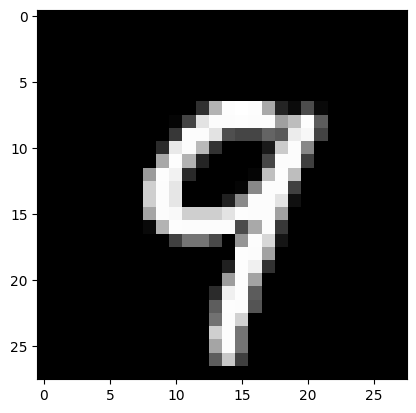

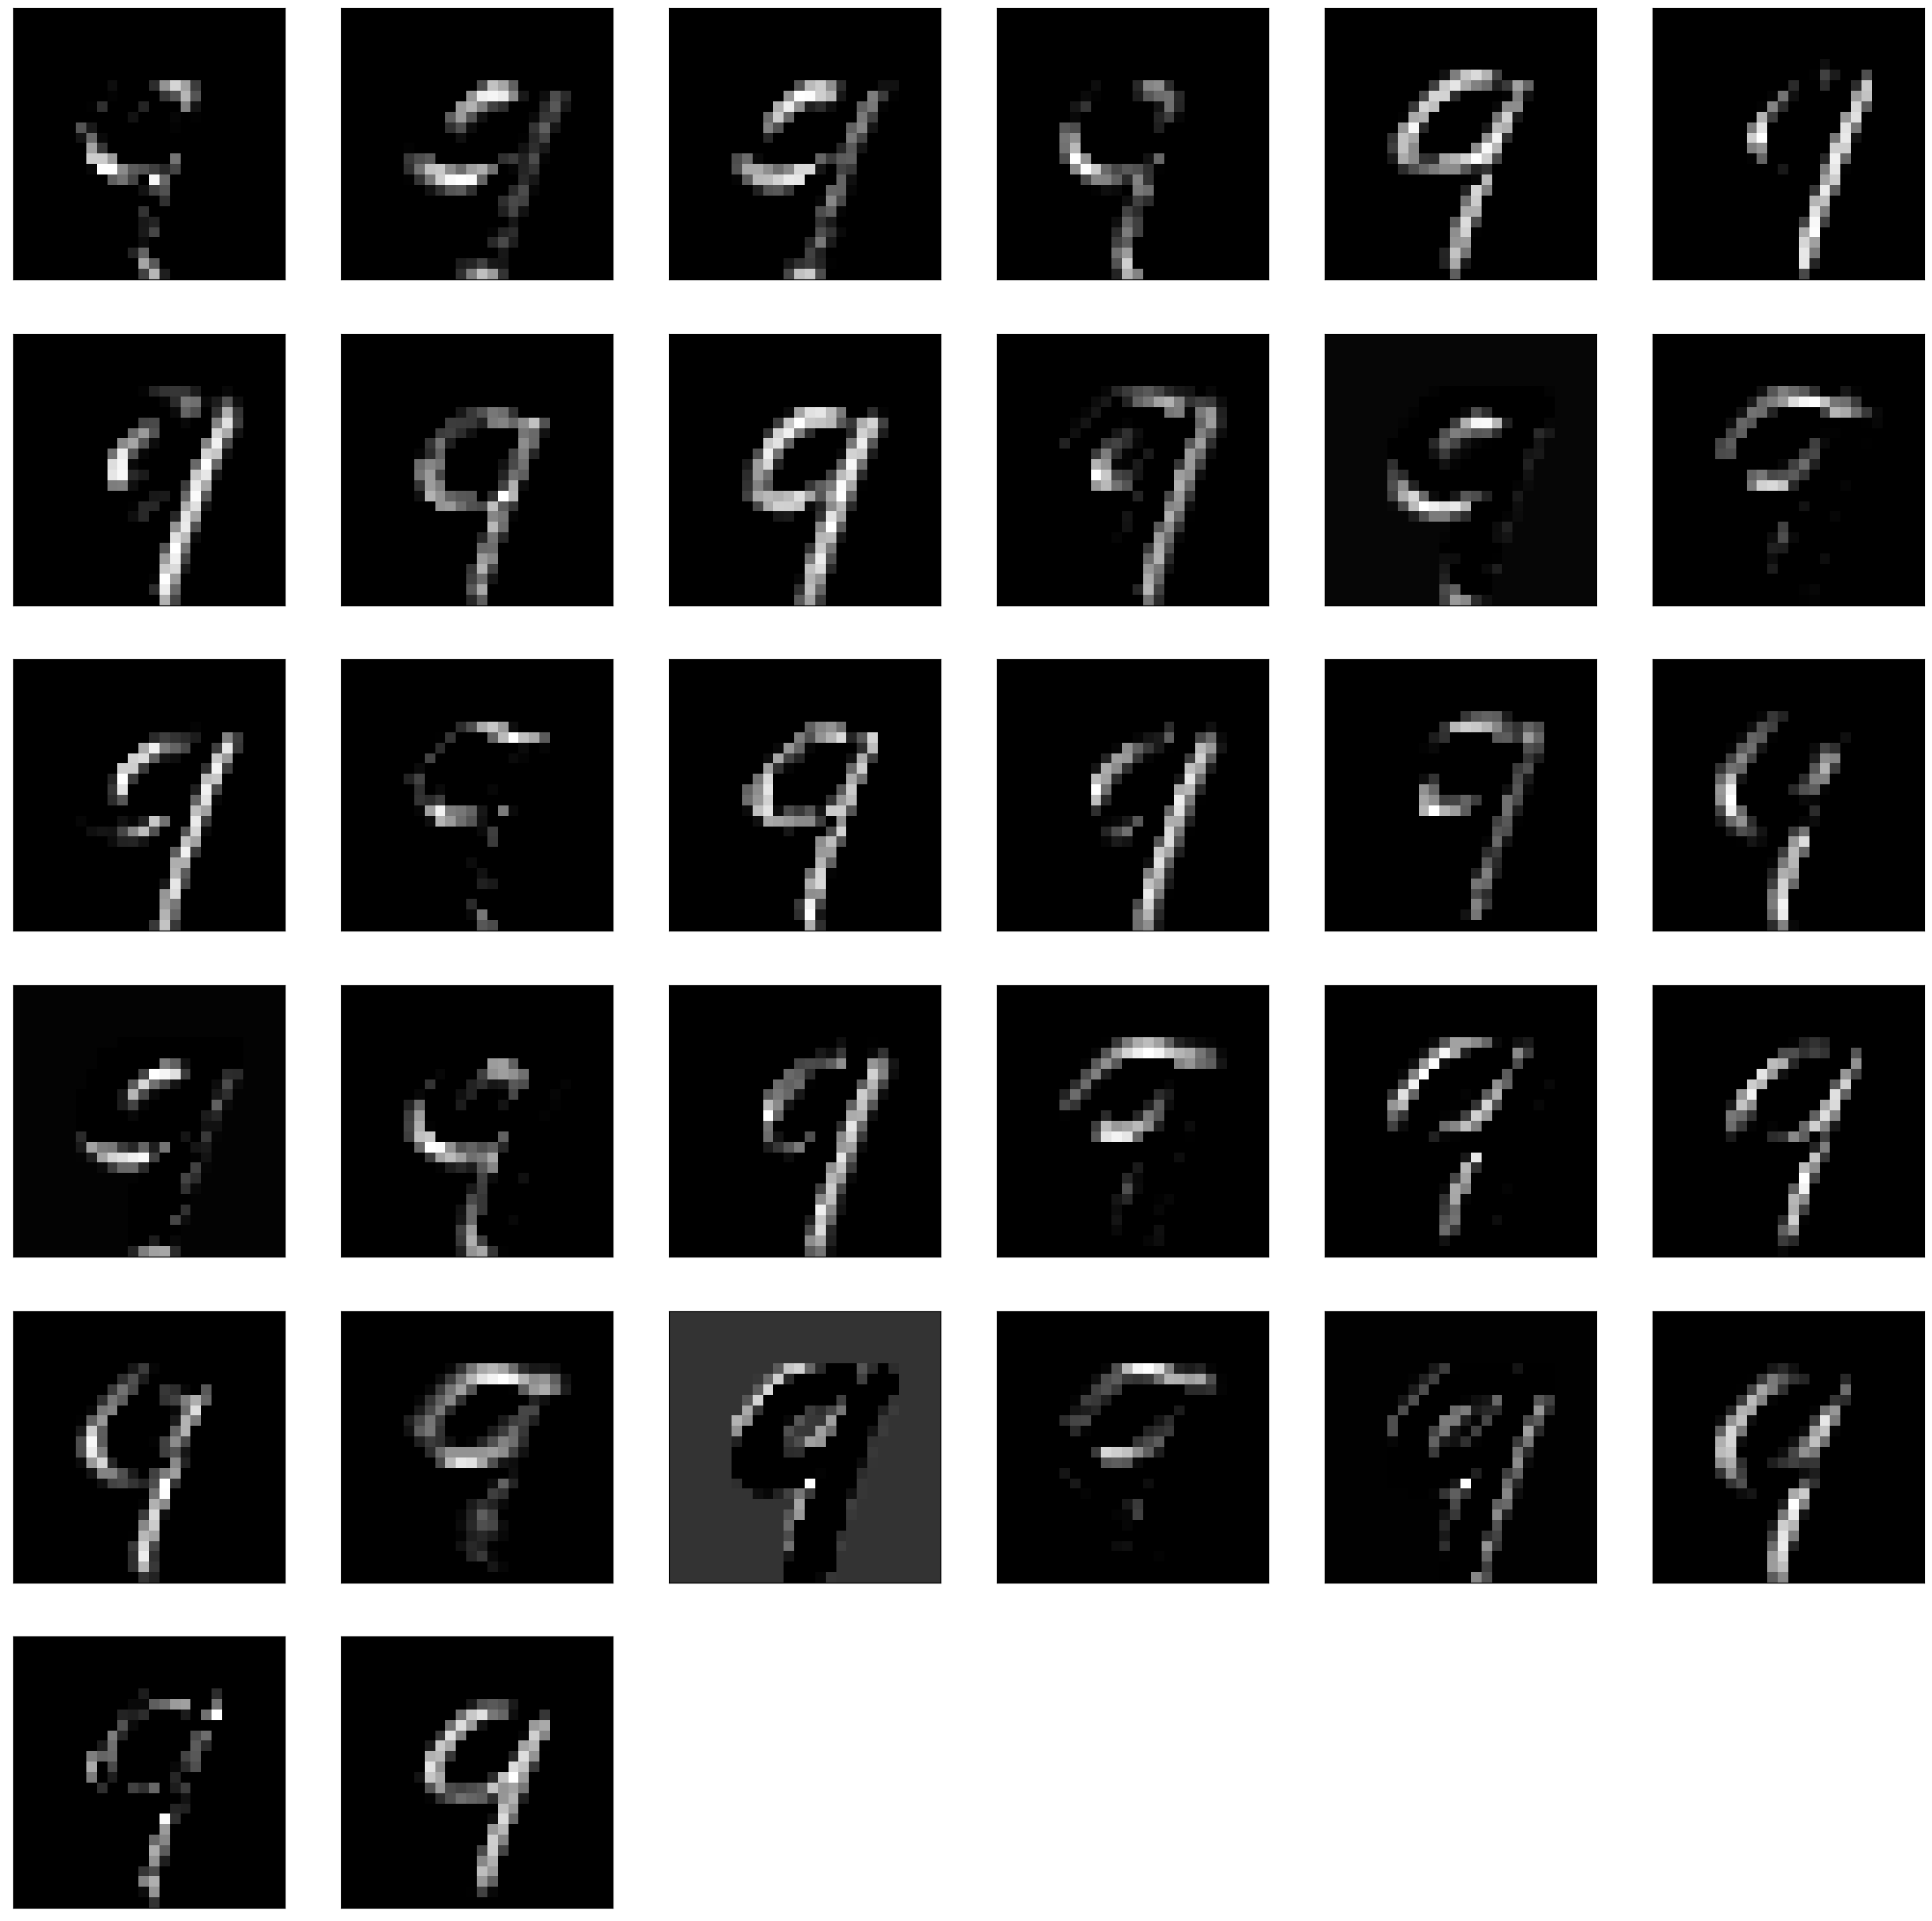

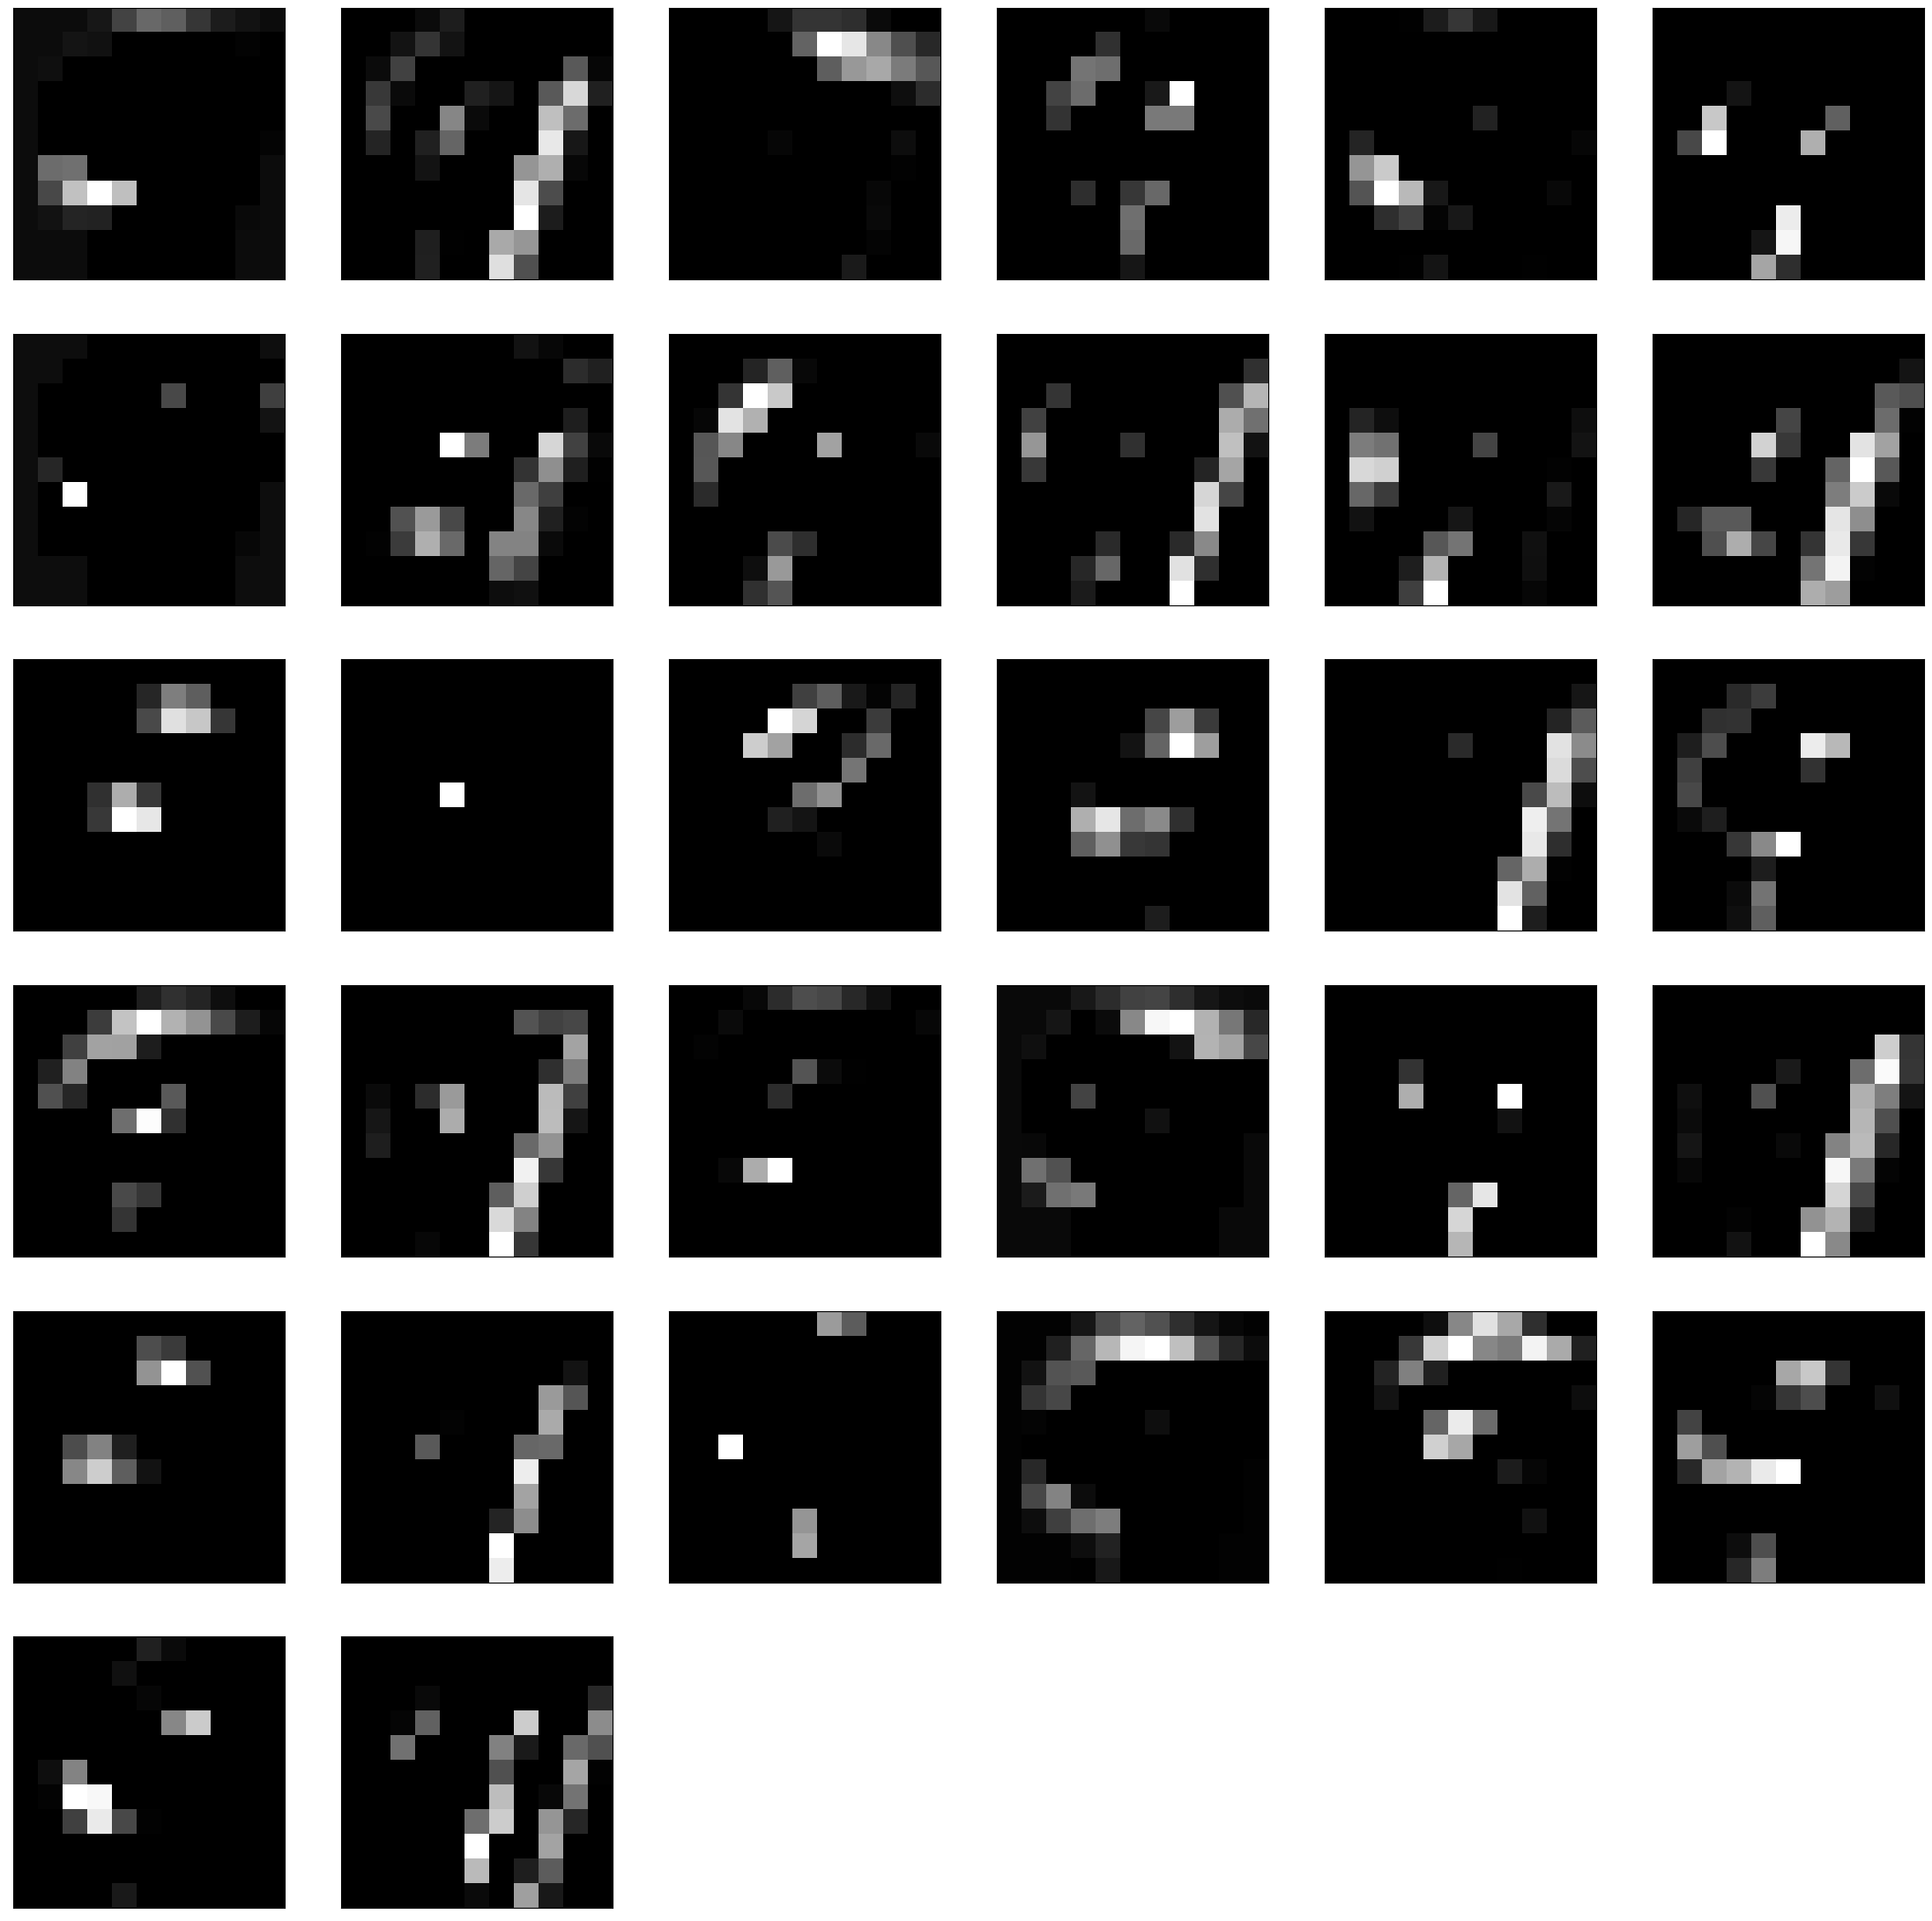

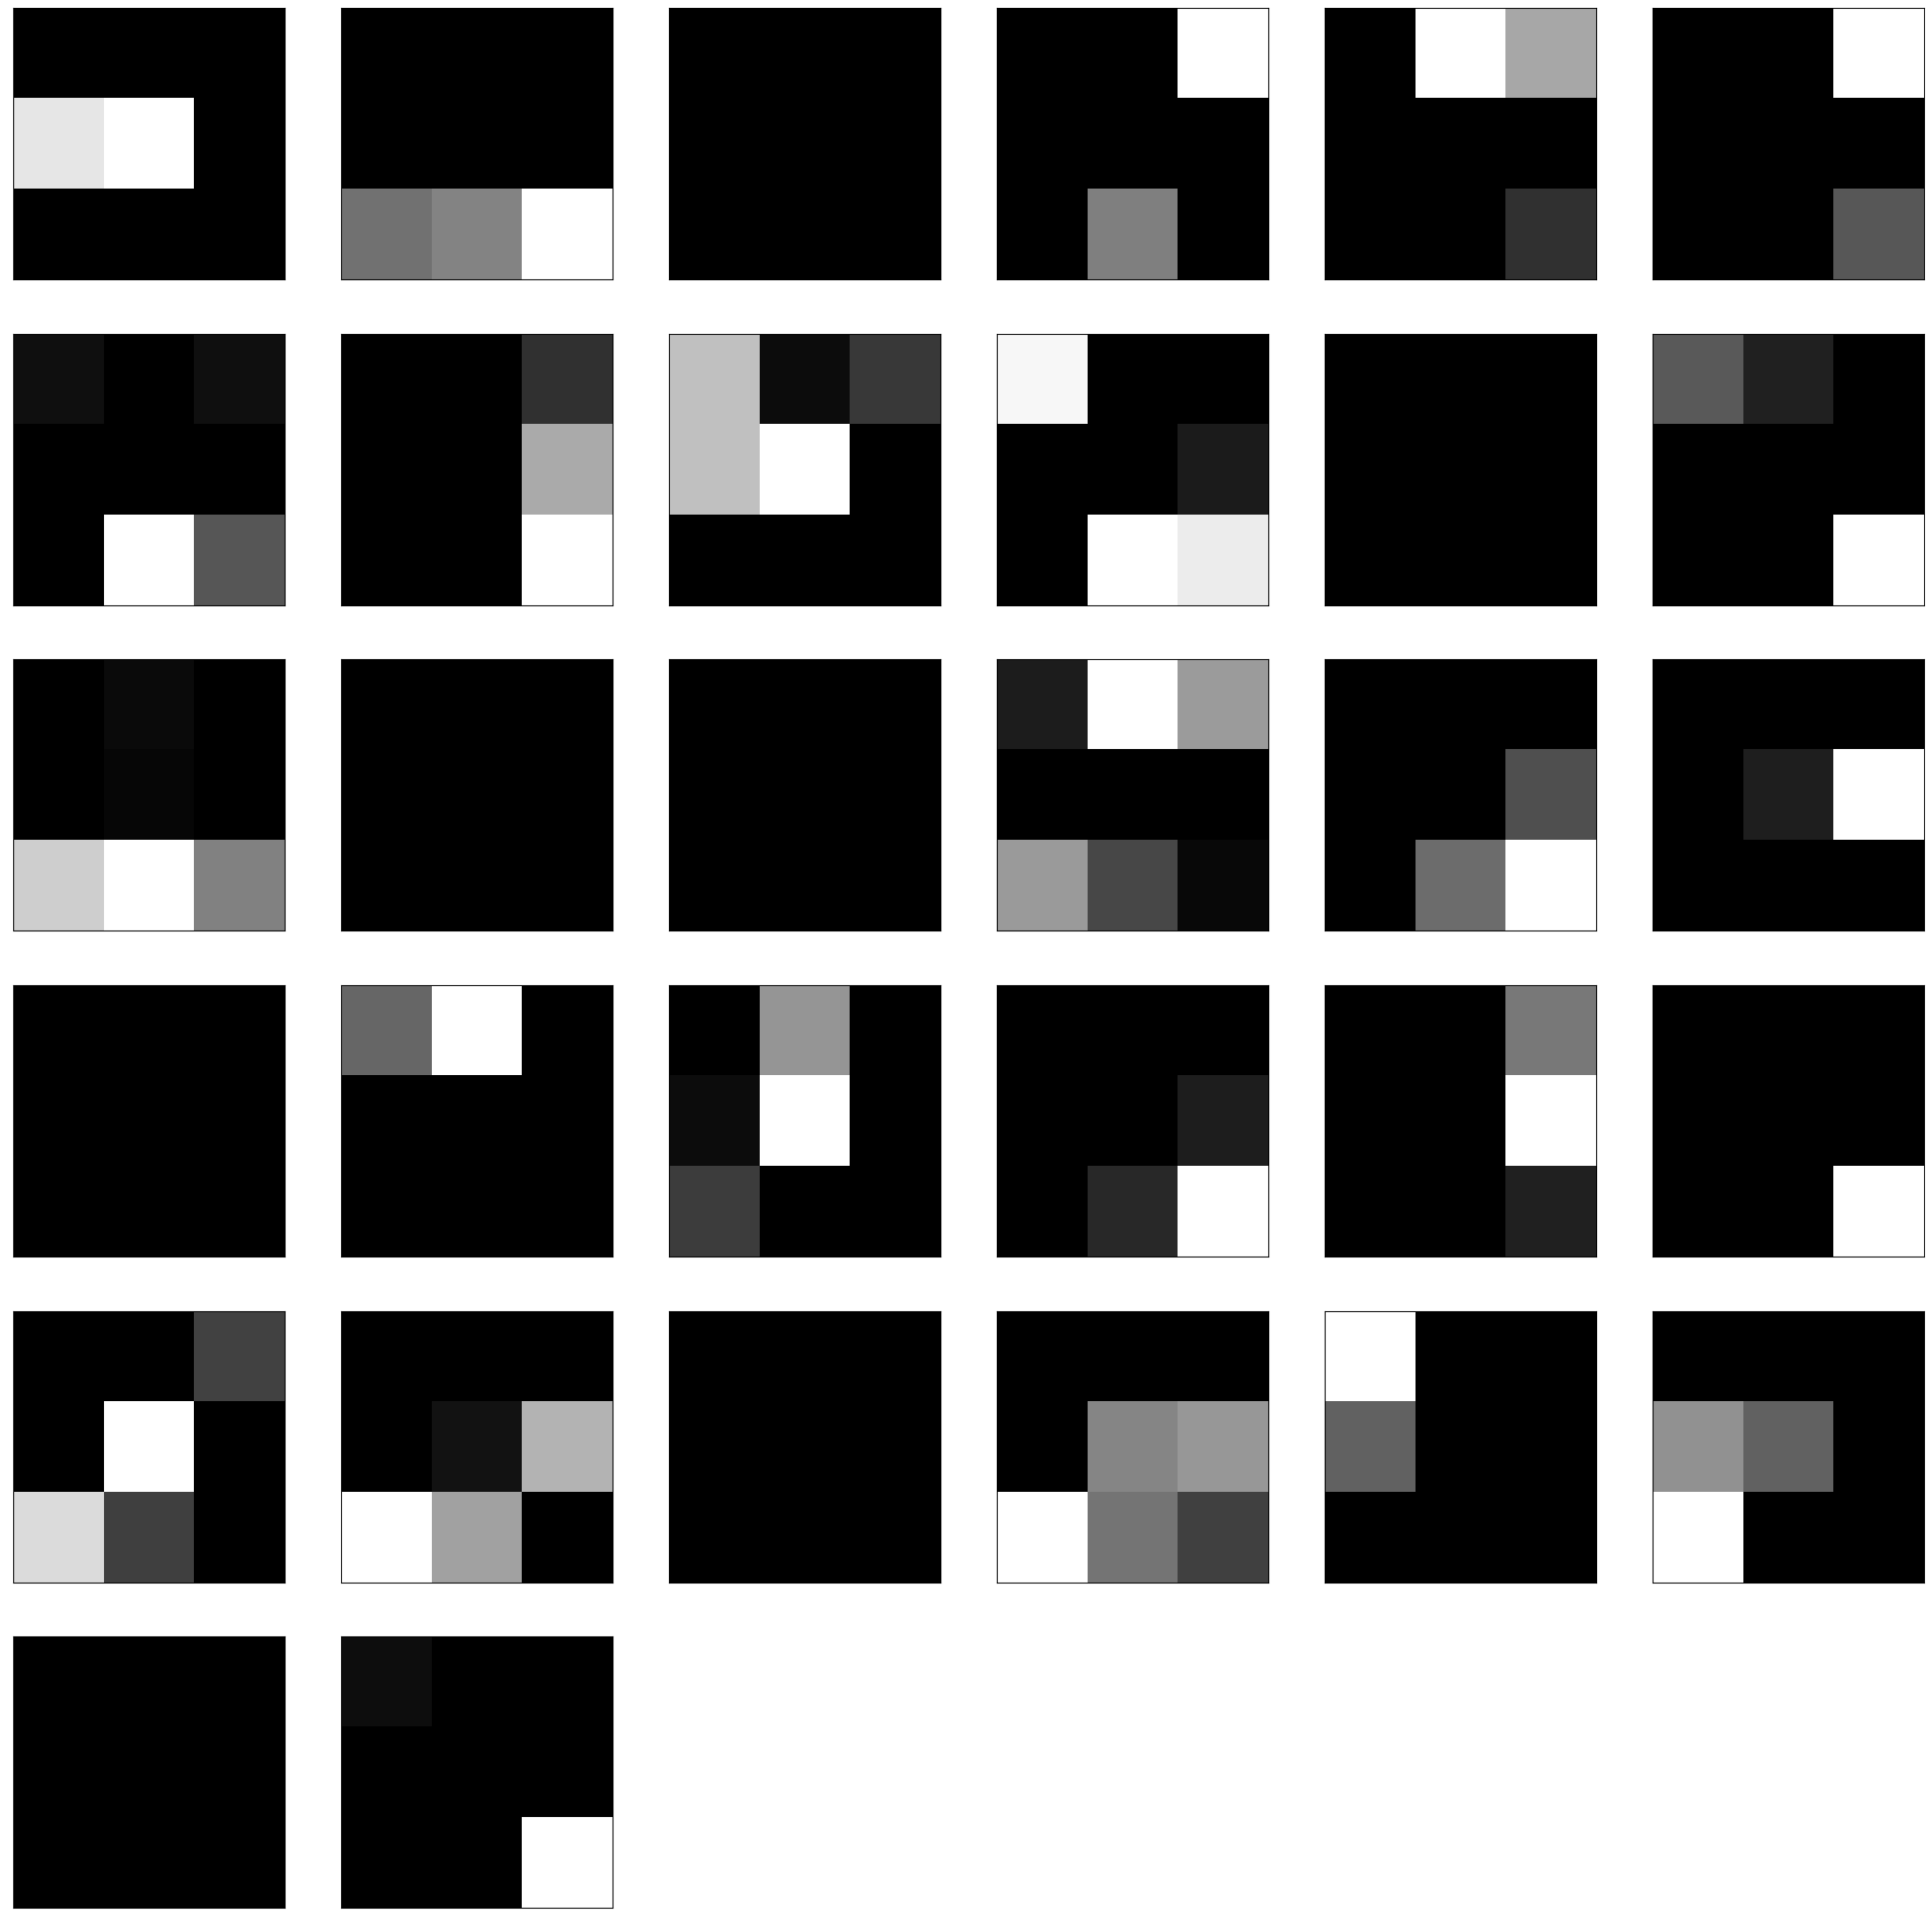

In [40]:
columns = 6
rows = 6
testImageIndexToTry = 12
testImage = test_images[testImageIndexToTry]
testImage = np.expand_dims(testImage, axis=0)

plt.imshow(print_test_images[testImageIndexToTry], cmap='gray')

feature_output = model_shortened.predict(testImage)
for the_filter in feature_output:
    figure2 = plt.figure(figsize=(28,28))
    for i in range(1, 32 + 1):
        figure2 = plt.subplot(rows, columns, i)
        figure2.set_xticks([])
        figure2.set_yticks([])
        plt.imshow(the_filter[0, :, :, i-1], cmap='gray')
    plt.show()